# PPI prediction for SC5 network

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score
import logging
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
from scipy.stats import ttest_ind
import scipy.stats  as stats
import networkx as nx
from joblib import dump, load
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedShuffleSplit
import pickle
import xgboost as xgb
#print(sklearn.__version__)
import import_ipynb
from PPI_functions import *
network_name='SC5'


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]
importing Jupyter notebook from PPI_functions.ipynb
1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


## source of data
## https://github.com/mlbioinfolab/ppi-metago/blob/master/protein_pair/EC2/EC2_pair.txt

## publication: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2907-1

In [2]:
#path_h="/Users/temih/Dropbox/PPI_similarity_new/data/"   # windows
path_h="/Users/hamidteimouri/Dropbox/PPI_similarity_new/data/" # mac


# Step0: Visualization of the network

In [3]:
#G4=network_vis('EC2',path_h)
#!pip install xgboost scikit-learn


# Step 1: Feature extraction using propy


#Descriptors_complete('EC2_sequence_fasta.txt','EC2_descriptors.csv')

# Step 2: Calculate PP distance

In [4]:
# distance_PP('EC2')

# Step 3: Upload data and train/test spilit

In [5]:
X,y,klist,df3=load_network_data(network_name, path_h)



In [6]:
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

# Step 4: Train logistic and SVM models using all features

In [7]:
all_features_traning_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [8]:
all_features_traning_results

{'average logistic regression accuracy:': 0.9831666666666664,
 'average SVM accuracy:': 0.9493333333333334,
 'average logistic regression recall:': 0.9831666666666667,
 'average SVM recall:': 0.9493333333333334,
 'average logistic regression matthews_corrcoef:': 0.9665680512377084,
 'average SVM matthews_corrcoef:': 0.900931900146896,
 'average logistic regression f1 score:': 0.9665680512377084,
 'average SVM f1 score:': 0.900931900146896}

In [9]:

## Save dat into pickle file
data_save = {}
data_save['all_features_traning_results']=all_features_traning_results

## now we check if model overfits

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=5
Y = y
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    results = models_overfitting(X_train, Y_train, X_test, Y_test)


Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.9775
Logistic Regression test_accuracy: 0.7150
Logistic Regression train_recall: 0.9775
Logistic Regression test_recall: 0.7150
Logistic Regression train_mcc: 0.9552
Logistic Regression test_mcc: 0.4441
Logistic Regression train_f1: 0.9777
Logistic Regression test_f1: 0.7467


SVC train_accuracy: 0.9537
SVC test_accuracy: 0.7350
SVC train_recall: 0.9538
SVC test_recall: 0.7350
SVC train_mcc: 0.9090
SVC test_mcc: 0.4769
SVC train_f1: 0.9550
SVC test_f1: 0.7558


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.9875
Logistic Regression test_accuracy: 0.7400
Logistic Regression train_recall: 0.9875
Logistic Regression test_recall: 0.7400
Logistic Regression train_mcc: 0.9752
Logistic Regression test_mcc: 0.4804
Logistic Regression train_f1: 0.9876
Logistic Regression test_f1: 0.7451


SVC train_accuracy: 0.9425
SVC test_accuracy: 0.7050
SVC train_recall: 0.9425
SVC test_recall: 0.705

# Step 5: Feature Selection Using Lasso Regression

In [11]:
AA=0.004
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)
featuredict_lasso = lasso_feature_selection(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

NR -0.19095658011436448
NF -0.08024610941067638
DG -0.11402221719388896
EI 0.18166794540657305
GR -0.39441592205641446
HI -0.08069616942548109
IH -0.17985420906818608
KT -0.0799800912573882
MF 0.05503061179207761
TR -0.08250589319374634
TY 0.20827345448878856
VH -0.1098981785427081
MoranAuto_ResidueASA18 -0.08333252339935511
_SolventAccessibilityC1 -0.20053953367281352
_ChargeC1 -0.5048243787656488
PAAC2 -0.11695879429166789


{'NR': -0.19095658011436448,
 'NF': -0.08024610941067638,
 'DG': -0.11402221719388896,
 'EI': 0.18166794540657305,
 'GR': -0.39441592205641446,
 'HI': -0.08069616942548109,
 'IH': -0.17985420906818608,
 'KT': -0.0799800912573882,
 'MF': 0.05503061179207761,
 'TR': -0.08250589319374634,
 'TY': 0.20827345448878856,
 'VH': -0.1098981785427081,
 'MoranAuto_ResidueASA18': -0.08333252339935511,
 '_SolventAccessibilityC1': -0.20053953367281352,
 '_ChargeC1': -0.5048243787656488,
 'PAAC2': -0.11695879429166789}

In [12]:
data_save['selected_features_lasso']=featuredict_lasso

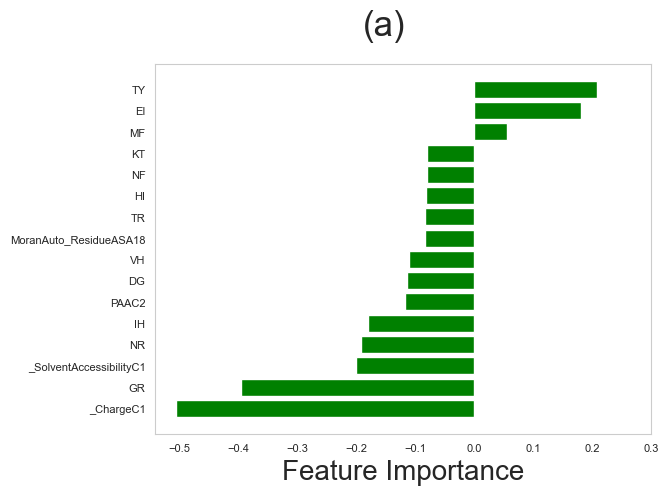

In [13]:

sorted_dict = sorted(featuredict_lasso.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.1
selected_features_plotter(featuredict,network_name,'lasso',20,dr)


## Now we train model using features selection from LASSO mothod

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.7650
Logistic Regression test_accuracy: 0.7100
Logistic Regression train_recall: 0.7650
Logistic Regression test_recall: 0.7100
Logistic Regression train_mcc: 0.5319
Logistic Regression test_mcc: 0.4270
Logistic Regression train_f1: 0.7746
Logistic Regression test_f1: 0.7339


SVC train_accuracy: 0.8400
SVC test_accuracy: 0.7050
SVC train_recall: 0.8400
SVC test_recall: 0.7050
SVC train_mcc: 0.6845
SVC test_mcc: 0.4147
SVC train_f1: 0.8487
SVC test_f1: 0.7256


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.7512
Logistic Regression test_accuracy: 0.7300
Logistic Regression train_recall: 0.7512
Logistic Regression test_recall: 0.7300
Logistic Regression train_mcc: 0.5060
Logistic Regression test_mcc: 0.4676
Logistic Regression train_f1: 0.7651
Logistic Regression test_f1: 0.7523


SVC train_accuracy: 0.8363
SVC test_accuracy: 0.7150
SVC train_recall: 0.8362
SVC test_recall: 0.715

In [15]:
scaled_features_df=df3
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    
    i+=1
    #print(i)
    

In [16]:
# traning metrics
lasso_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)
lasso_results

{'average logistic regression accuracy:': 0.7578750000000001,
 'average SVM accuracy:': 0.835,
 'average logistic regression recall:': 0.7578750000000001,
 'average SVM recall:': 0.835,
 'average logistic regression matthews_corrcoef:': 0.5183598539131498,
 'average SVM matthews_corrcoef:': 0.6741968353438643,
 'average logistic regression f1 score:': 0.5183598539131498,
 'average SVM f1 score:': 0.6741968353438643}

In [17]:
data_save['lasso_results']=lasso_results

# Step 7: Feature Selection Using Support Vector Machine

In [18]:
ns = 18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [19]:

CC = linear_SVM_grid_search(X,y,ns)
#CC=0.2
CC

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/sit

0.1

In [20]:
featuredict_svm = svm_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist)
featuredict_svm

NR -0.40914883310047606
NF -0.23564811604733205
DG -0.23031327321049794
ED 0.21801044580786078
EI 0.4579061230137557
GR -0.8514340057222455
HI -0.1985923388797624
IH -0.36903701492860264
LF 0.24993541927996166
KT -0.19015646135509312
MF 0.17038750520890478
TY 0.4734127945972111
WG -0.24808325568710654
WP -0.4083945804581669
VH -0.2176315028330613
VL -0.23711371797101594
MoranAuto_FreeEnergy11 -0.17058045347273335
_SolventAccessibilityC1 -0.548699510033175
_ChargeC1 -1.1229305747604532
PAAC2 -0.23687266989081554


{'NR': -0.40914883310047606,
 'NF': -0.23564811604733205,
 'DG': -0.23031327321049794,
 'ED': 0.21801044580786078,
 'EI': 0.4579061230137557,
 'GR': -0.8514340057222455,
 'HI': -0.1985923388797624,
 'IH': -0.36903701492860264,
 'LF': 0.24993541927996166,
 'KT': -0.19015646135509312,
 'MF': 0.17038750520890478,
 'TY': 0.4734127945972111,
 'WG': -0.24808325568710654,
 'WP': -0.4083945804581669,
 'VH': -0.2176315028330613,
 'VL': -0.23711371797101594,
 'MoranAuto_FreeEnergy11': -0.17058045347273335,
 '_SolventAccessibilityC1': -0.548699510033175,
 '_ChargeC1': -1.1229305747604532,
 'PAAC2': -0.23687266989081554}

In [21]:
data_save['selected_features_svm']=featuredict_svm

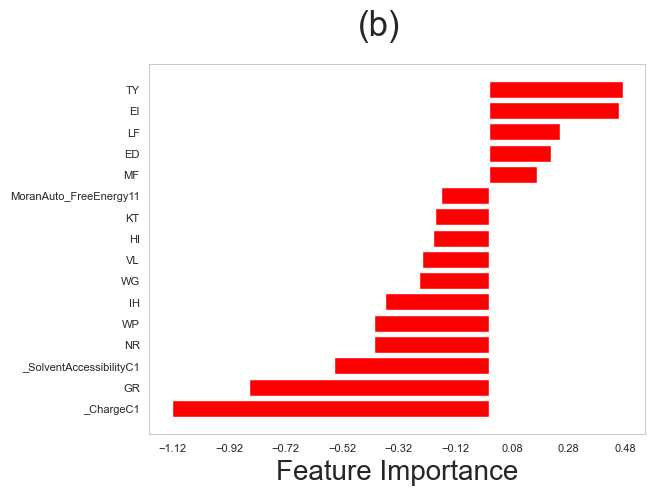

In [22]:

sorted_dict = sorted(featuredict_svm.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.2
selected_features_plotter(featuredict,network_name,'svm',20,dr)


## Training models using selected features from SVM

In [23]:
scaled_features_df=df3

cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    i+=1

In [24]:
results_svm = models_crossval(Xtrain_cv,Ytrain_cv,ns)
results_svm

{'average logistic regression accuracy:': 0.77125,
 'average SVM accuracy:': 0.8515277777777778,
 'average logistic regression recall:': 0.77125,
 'average SVM recall:': 0.8515277777777778,
 'average logistic regression matthews_corrcoef:': 0.54534946176798,
 'average SVM matthews_corrcoef:': 0.7065876595420189,
 'average logistic regression f1 score:': 0.54534946176798,
 'average SVM f1 score:': 0.7065876595420189}

In [25]:
data_save['results_svm']=results_svm

# check for overfitting

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.7600
Logistic Regression test_accuracy: 0.7600
Logistic Regression train_recall: 0.7600
Logistic Regression test_recall: 0.7600
Logistic Regression train_mcc: 0.5217
Logistic Regression test_mcc: 0.5252
Logistic Regression train_f1: 0.7692
Logistic Regression test_f1: 0.7757


SVC train_accuracy: 0.8525
SVC test_accuracy: 0.7300
SVC train_recall: 0.8525
SVC test_recall: 0.7300
SVC train_mcc: 0.7079
SVC test_mcc: 0.4660
SVC train_f1: 0.8589
SVC test_f1: 0.7500


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.7612
Logistic Regression test_accuracy: 0.7450
Logistic Regression train_recall: 0.7612
Logistic Regression test_recall: 0.7450
Logistic Regression train_mcc: 0.5265
Logistic Regression test_mcc: 0.4956
Logistic Regression train_f1: 0.7750
Logistic Regression test_f1: 0.7628


SVC train_accuracy: 0.8575
SVC test_accuracy: 0.7550
SVC train_recall: 0.8575
SVC test_recall: 0.755

In [27]:
with open(network_name+'_results.pkl' , 'wb') as file:
    pickle.dump(data_save,file)

In [28]:
with open(network_name+'_results.pkl' , 'rb') as file:
    load_data=pickle.load(file)
    